Defición de operador matemático convolución

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
xt = np.array([1,2,4,3,7,2])
gt = np.array([1,0,8])

In [3]:
yt = np.convolve(xt,gt,'full')
print("xt*gt->",yt)

xt*gt-> [ 1  2 12 19 39 26 56 16]


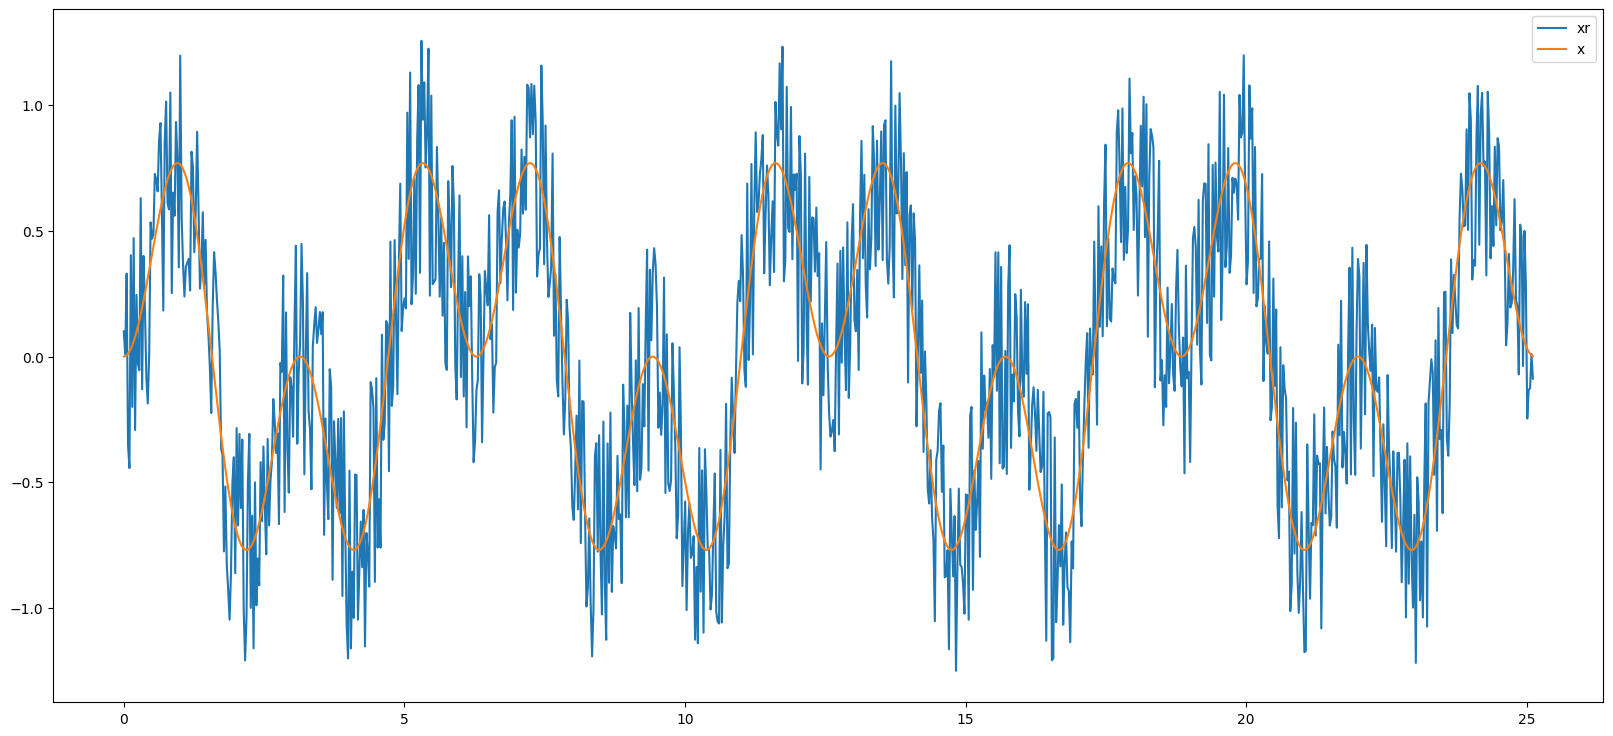

In [9]:
n = 1000
i = np.array(range(n))
t = i * 8 * np.pi / n
x = np.sin(t) * np.sin(2*t) #señal original

r = np.random.random_sample(size = n) - 0.5 #ruido
xr = x + r #señal con ruido
plt.figure(figsize=(20,9))
plt.plot(t,xr)
plt.plot(t,x)
plt.legend(['xr', 'x'])
plt.show()

Filtrar el ruido

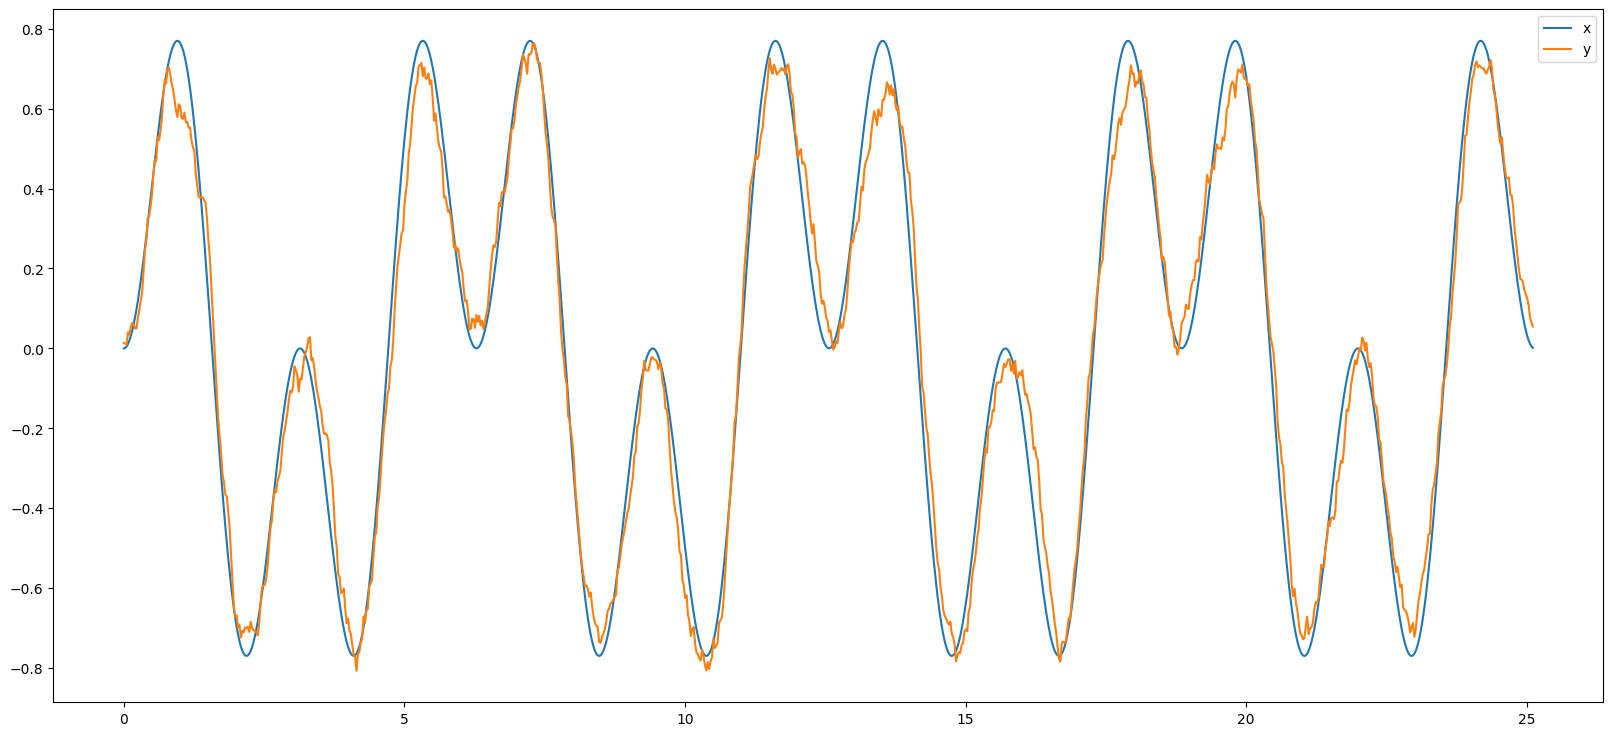

In [12]:
m = 20
g = np.ones((m)) / m
y = np.convolve(xr, g, 'same')
plt.figure(figsize=(20,9))
plt.plot(t,x)
plt.plot(t,y)
plt.legend(['x','y'])
plt.show()

2) Separación de dos señaes (con Gausianas)

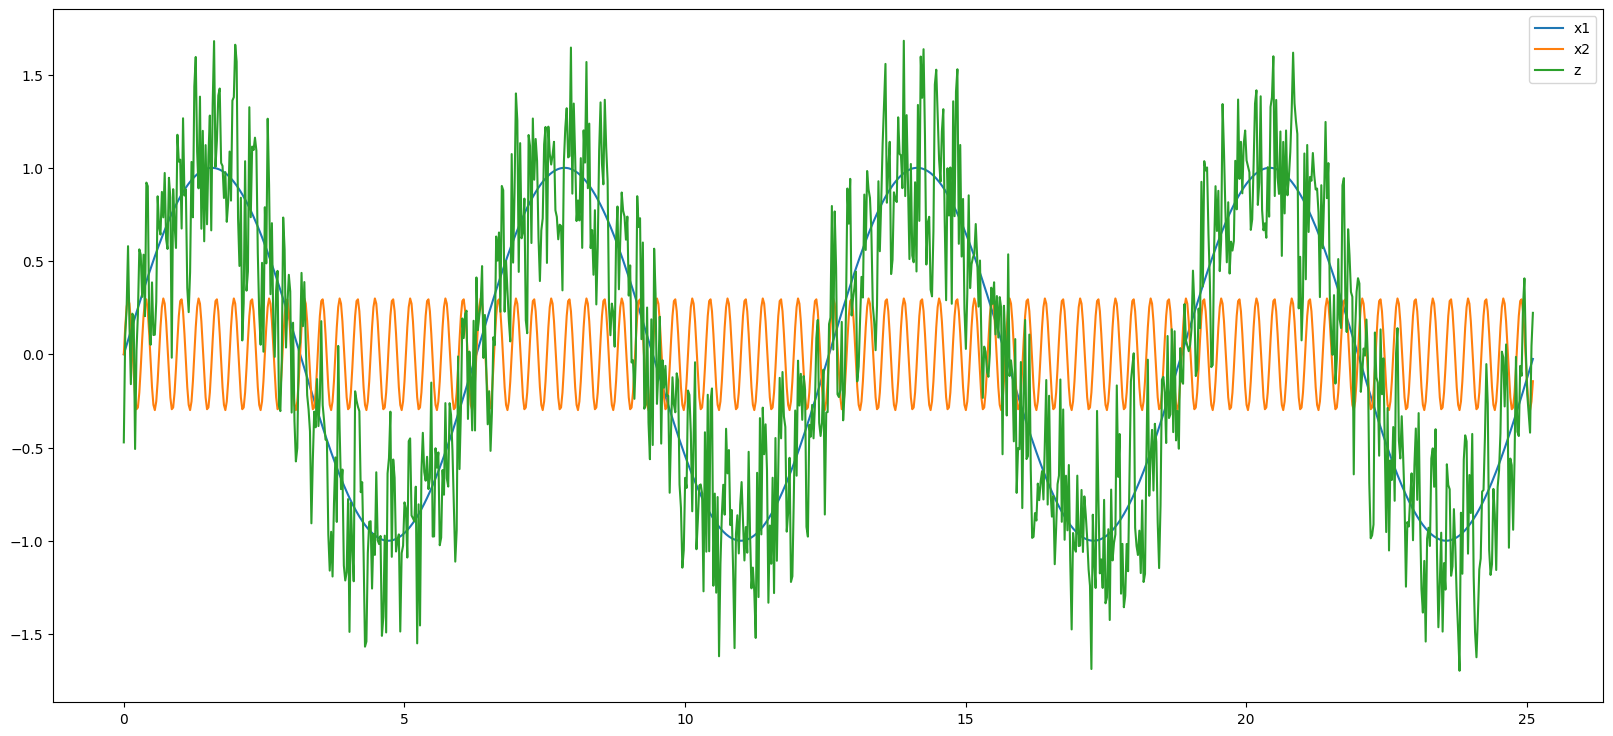

In [13]:
m = 1000
i = np.array(range(n))
t = i * 8 * np.pi/n
x1 = np.sin(t)
x2 = 0.3*np.sin(20*t)
x = x1 + x2
r = np.random.random_sample(size = n) - 0.5 #ruido
z = x + r
plt.figure(figsize=(20,9))
plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,z)
plt.legend(['x1','x2','z'])
plt.show()

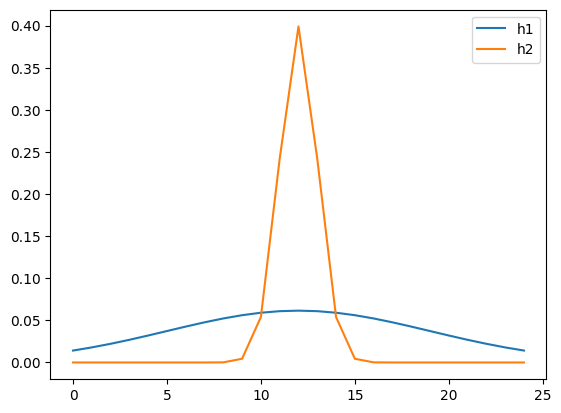

In [14]:
m = 25
h1 = cv.getGaussianKernel(m,7)
h2 = cv.getGaussianKernel(m,1)
plt.plot(h1)
plt.plot(h2)
plt.legend(['h1','h2'])
plt.show()

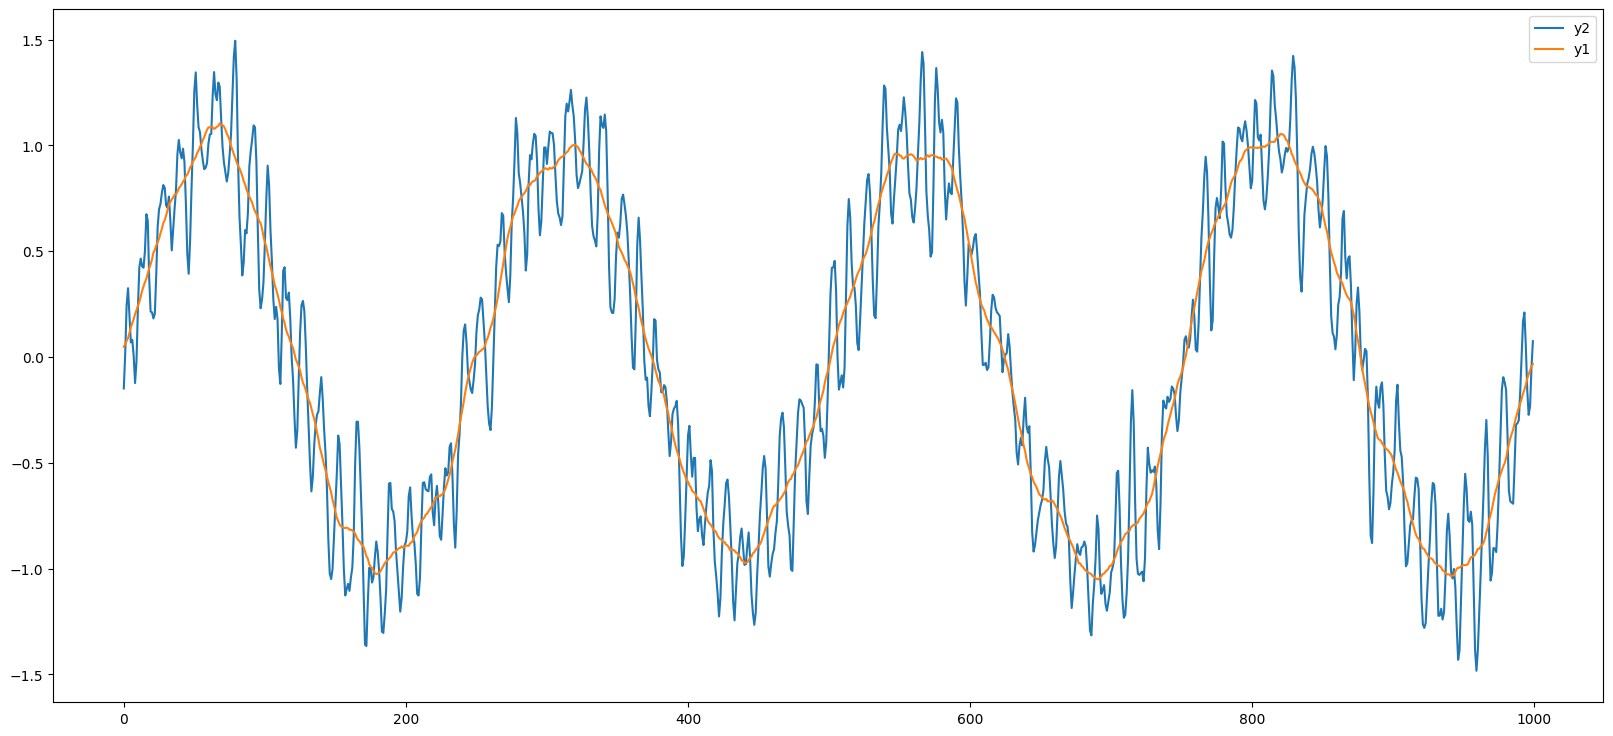

In [15]:
y1 = np.convolve(z,h1[:,0],'same')
y2 = np.convolve(z,h2[:,0], 'same')
plt.figure(figsize=(20,9))
plt.plot(y2)
plt.plot(y1)
plt.legend(['y2','y1'])
plt.show()

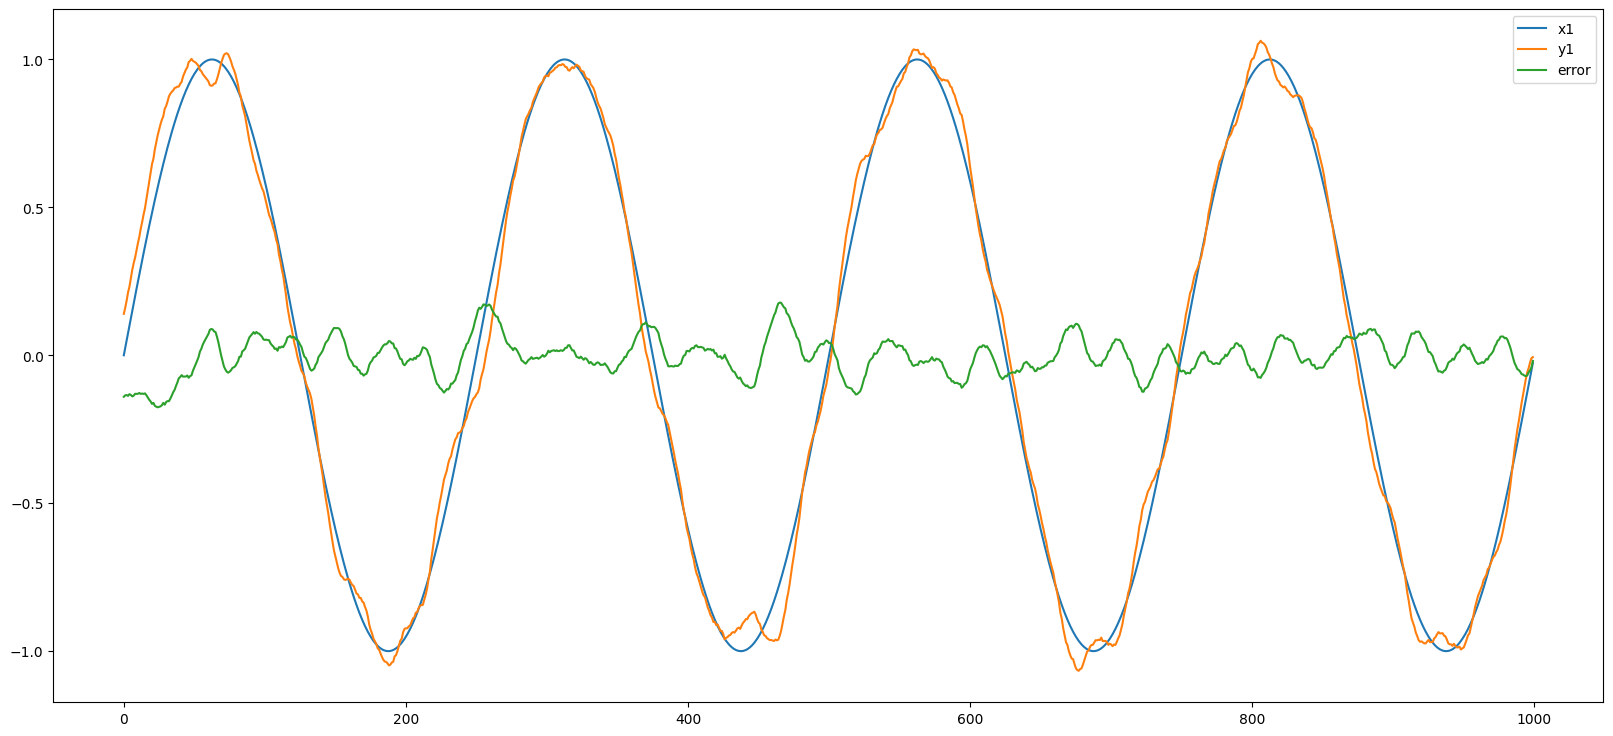

In [37]:
plt.figure(figsize=(20,9))
plt.plot(x1)
plt.plot(y1)
plt.plot(x1-y1)
plt.legend(['x1','y1', 'error'])
plt.show()

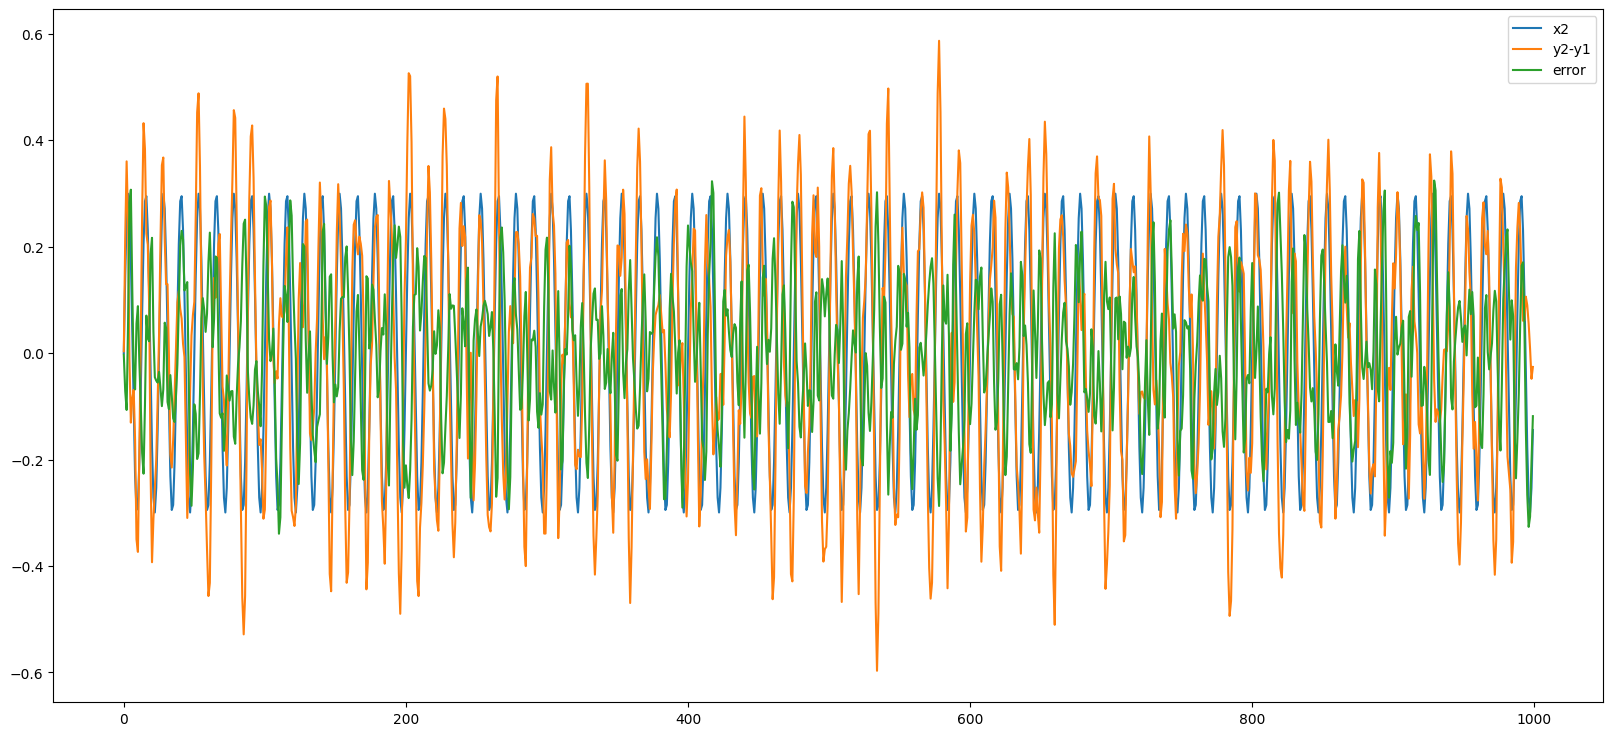

In [38]:
y3 = -y1 + y2
plt.figure(figsize=(20,9))
plt.plot(x2)
plt.plot(y3)
plt.plot(x2 - y3)
plt.legend(['x2','y2-y1', 'error'])
plt.show()

Simulación de una imagen con movimiento horizontal

In [65]:
imagen_1 = cv.imread('imagenes/zebra_bw.png')
imagen = cv.cvtColor(imagen_1, cv.COLOR_RGB2GRAY)
#imagen = cv.cvtColor(imagen_1, cv.COLOR_RGB2GRAY)

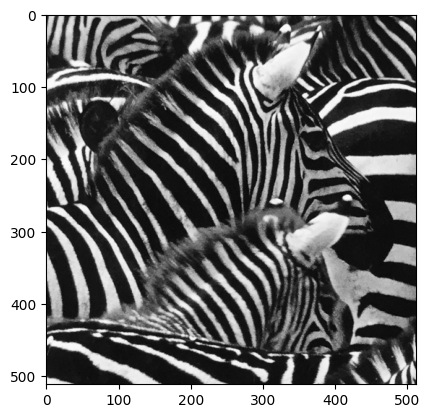

In [66]:
plt.imshow(imagen, 'gray')

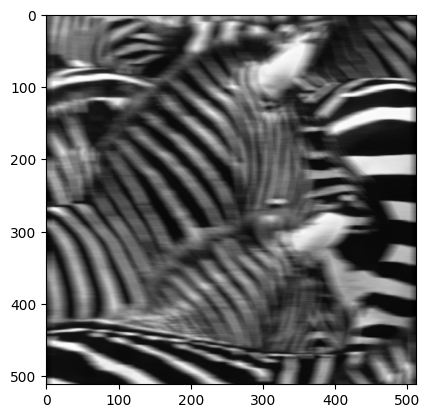

In [58]:
#convolución linea por linea
m = 20
g = np.ones((m)) / m
a,b = imagen.shape
y = np.zeros((a,b))
for i in range(a):
    y[i,:] = np.convolve(imagen[i,:], g, 'same')
#plt.show(y)
plt.imshow(y,'gray')

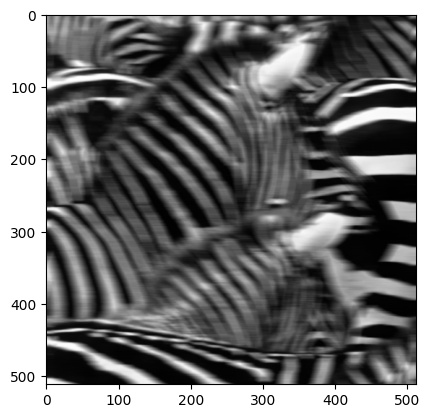

In [59]:
h = g.reshape(1,m)
y = cv.filter2D(imagen,-1,h)
plt.imshow(y, 'gray')

Detección de bordes

In [60]:
xd = imagen.astype(float)
print(xd)

[[ 32.  32.  38. ... 240. 240. 238.]
 [ 30.  35.  38. ... 239. 237. 237.]
 [ 45.  41.  36. ... 237. 236. 235.]
 ...
 [244. 243. 244. ... 136.  40.  27.]
 [244. 244. 244. ... 161.  53.  25.]
 [243. 243. 244. ... 199.  84.  23.]]


[[-1  0  1]]


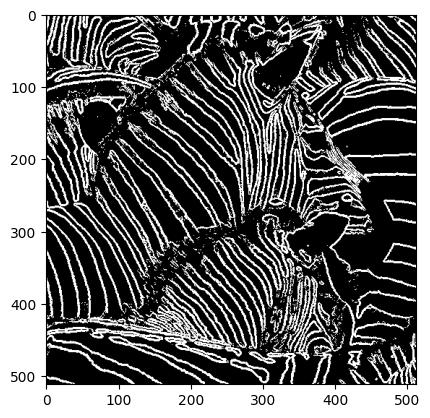

In [61]:
xd = imagen.astype(float)
th = 40
h1 = np.array([-1,0,1]) #filtro
temp = cv.filter2D(xd, -1, h1)
y1 = np.abs(cv.filter2D(xd, -1, h1))
z1 = y1 > th

h2 = h1.reshape(1,3)
print(h2)
y2 = np.abs(cv.filter2D(xd, -1, h2))
z2 = y2 > th
z = np.logical_or(z1,z2)
plt.imshow(z, 'gray')
#plt.imshow(z2, 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


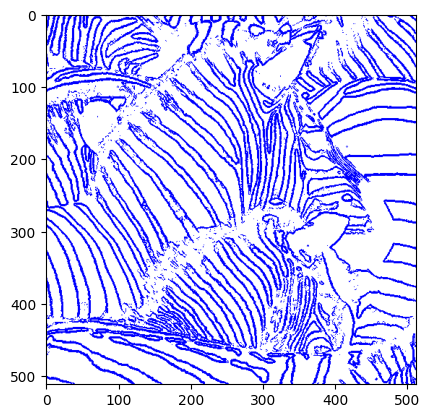

In [64]:
a,b = imagen.shape
print(imagen_1.shape)
d = np.zeros((a,b,3))
d[:,:,1] = np.multiply(imagen, (1-z))
d[:,:,0] = np.multiply(imagen, (1-z))
d[:,:,2] = imagen
plt.imshow(d,'gray')
#contours, _ = cv.findContours(, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#cv.drawContours(imagen, contours, -1, (0, 255, 0), 2)  # Pinta los bordes en verde (0, 255, 0) con un grosor de 2 píxeles
#plt.imshow(contours)

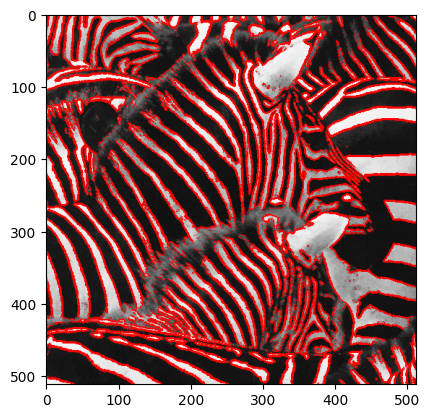

In [70]:
N, M, b = imagen_1.shape
imagen_new = imagen_1
for i in range(N):
    for j in range(M):
        if (z[i,j] == 1):
            imagen_new[i,j,:] = [255,0,0]

plt.imshow(imagen_new)